## BANK COUSTOMER CHURN

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
df=pd.read_csv('/Users/draculalemon/Downloads/Churn_Modelling.csv')

In [3]:
df1=df.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#checking for missing val
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#checking for duplicates value
df.loc[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
#droping usless columns
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

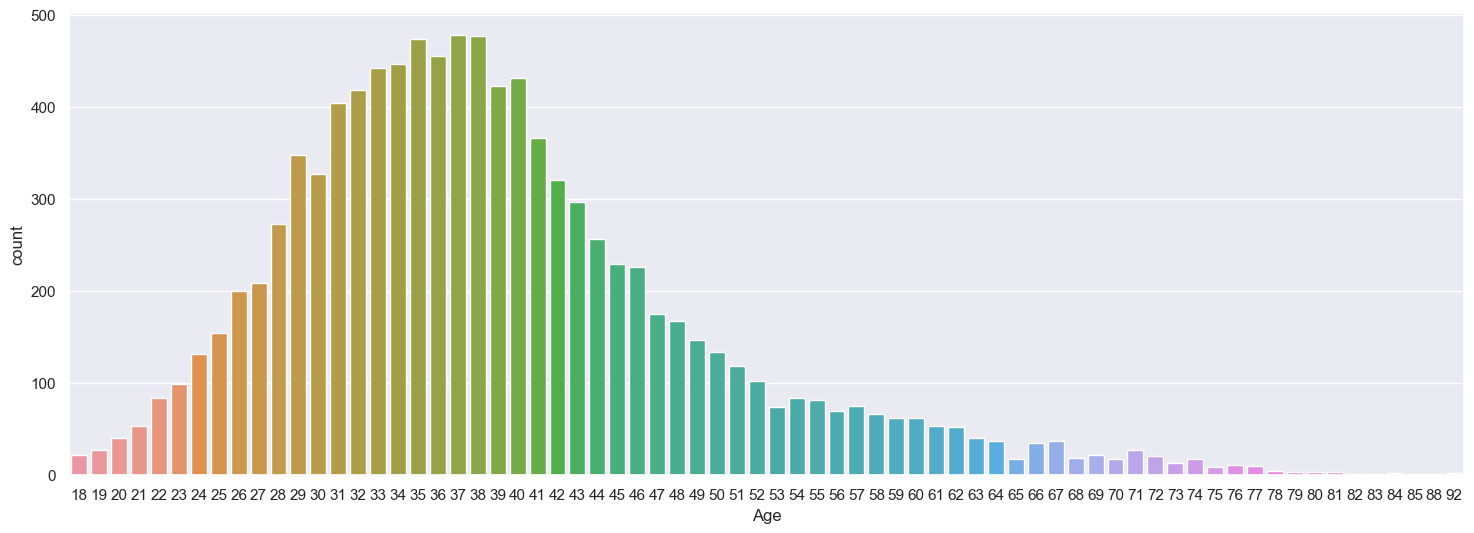

In [286]:
#age distribution
plt.figure(figsize=(18, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Age", data=df)

we can see that the mean age is around 35-38 range 

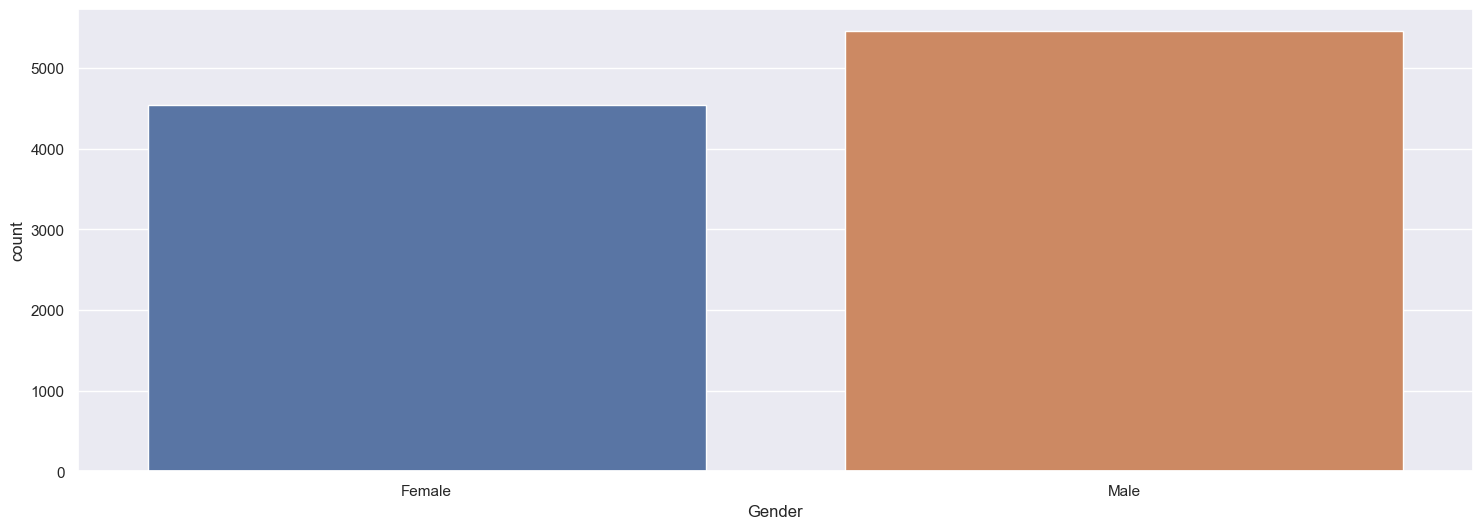

In [293]:
#counting the frequency of gender
plt.figure(figsize=(18, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", data=df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

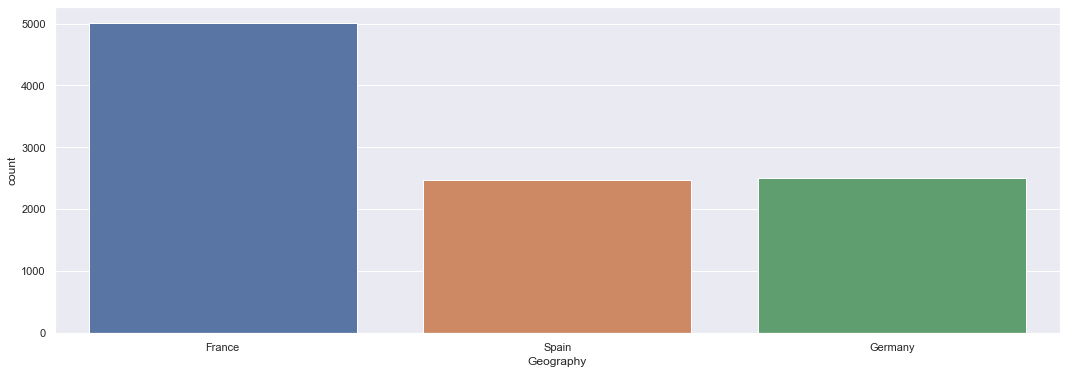

In [12]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Geography', data=df)

The bank has more customer situated in france then spain and germany seems equall.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

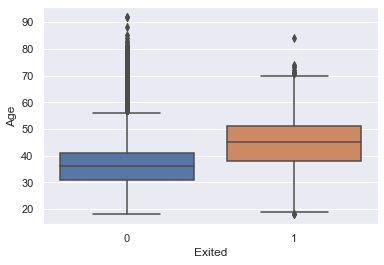

In [14]:
sns.boxplot(x="Exited", y="Age", data=df)

1 means leaving and o means not
so with the above graph we can see that age group around 40-50 are leaving the bank more than below 40.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

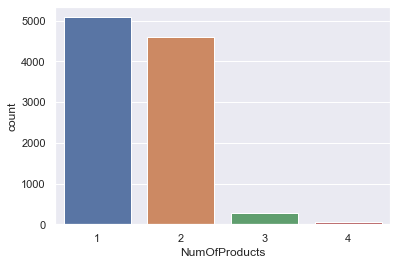

In [15]:
sns.countplot(x="NumOfProducts", data=df)

bank diffrent product and which product are using most by the coustomer.

<AxesSubplot:xlabel='HasCrCard', ylabel='EstimatedSalary'>

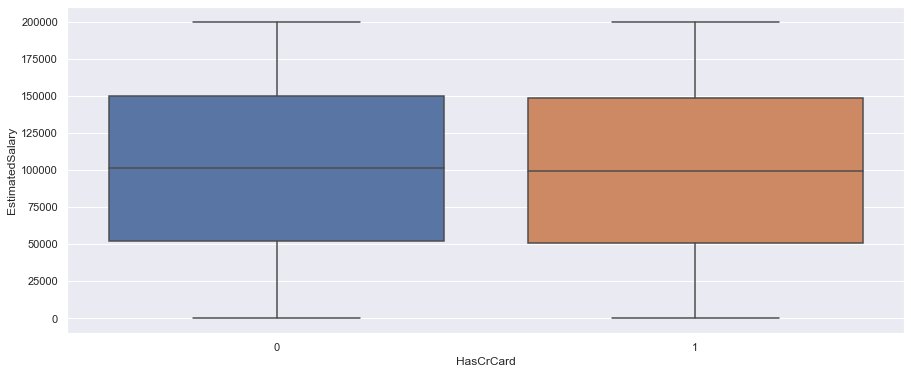

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="HasCrCard", y="EstimatedSalary", data=df)

salary of the customer having credit card vs not having credit card seems same,
so the bank must acquire the remaining customer which is in blue, by giving them certain benefit 
regarding having credit card.

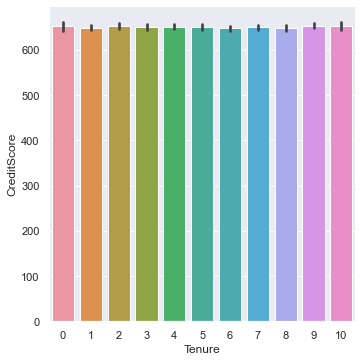

In [17]:

sns.catplot(x=df['Tenure'],y=df['CreditScore'],data=df.sort_values('Tenure',ascending=False),kind='bar')

Drawning a hypothesis does credit score increase with the tenuer?
but its seems this hypothesis dosent hold true as we can see above.

<AxesSubplot:xlabel='Age', ylabel='Balance'>

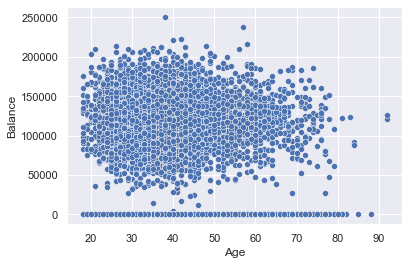

In [18]:
sns.scatterplot(x="Age", y="Balance", data=df)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

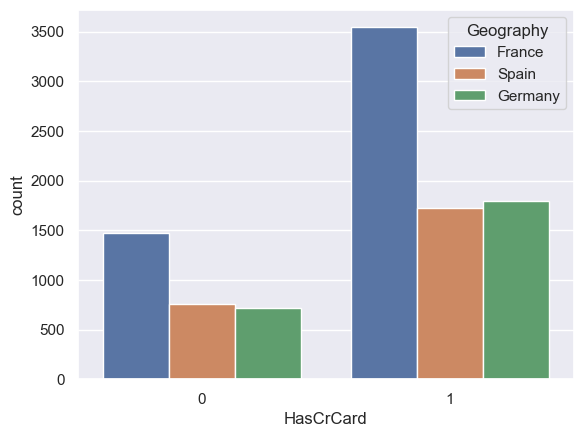

In [294]:
#whcih geography region having more credit card customer
sns.countplot(x="HasCrCard", data=df, hue="Geography")

its seems france is outperfroming in term of most credit card used country.

<AxesSubplot:xlabel='Exited', ylabel='count'>

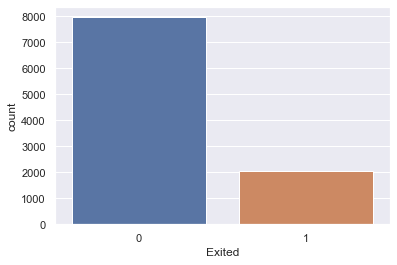

In [20]:
sns.countplot(x="Exited", data=df)

number of customer leaving the bank 1 is left the bank and 0 means there with the bank

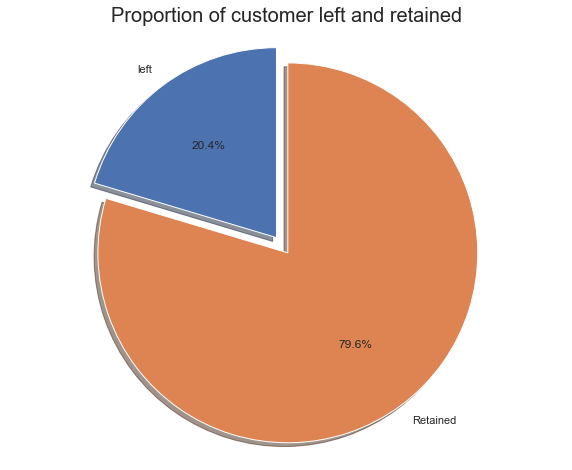

In [21]:
labels = 'left', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer left and retained", size = 20)
plt.show()


The proportion of female customers churning is also greater than that of male customers

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

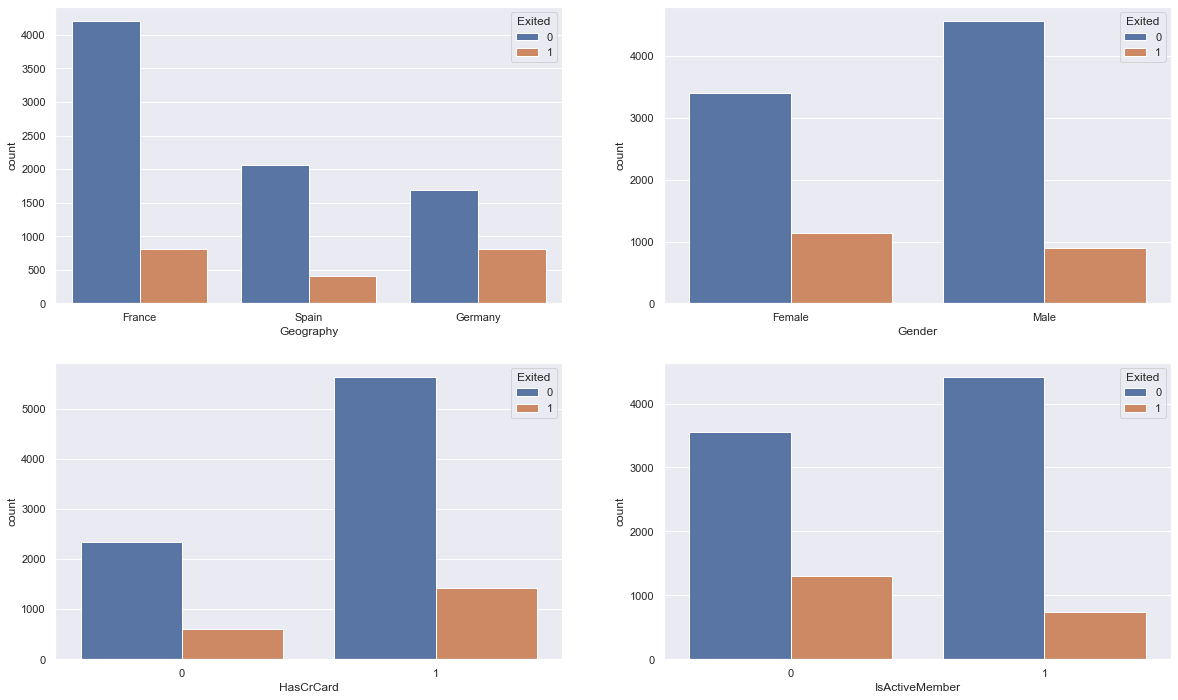

In [22]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

From the above subplots we can see different inferance like.

1) Geography= there are more people who are existed in france, but in germany almost half of thecustomer are leaving as compared to its not leaving customer
the bank must take certain measure as in germany there arent many people who are getting served by the bank
and on top of that those customer are also churning due to some reason.

2) Gender= seems bank are having more male customer than female, and also female customer are
leaving the bank more than the male.

3) Has_credit_Card= 0 are the customer not having credit card and left the bank, and 1 having credit card and didnt left the bank, seems
a majority of the population are having credit card.

4)Active_Member= seeing the graph we can tell that there are more active existing member than 
non_existing.

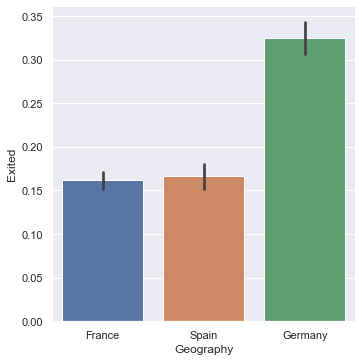

In [23]:
sns.catplot(x=df['Geography'],y=df['Exited'],data=df.sort_values('Tenure',ascending=False),kind='bar')

this seems that most of the people are existed from germany

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

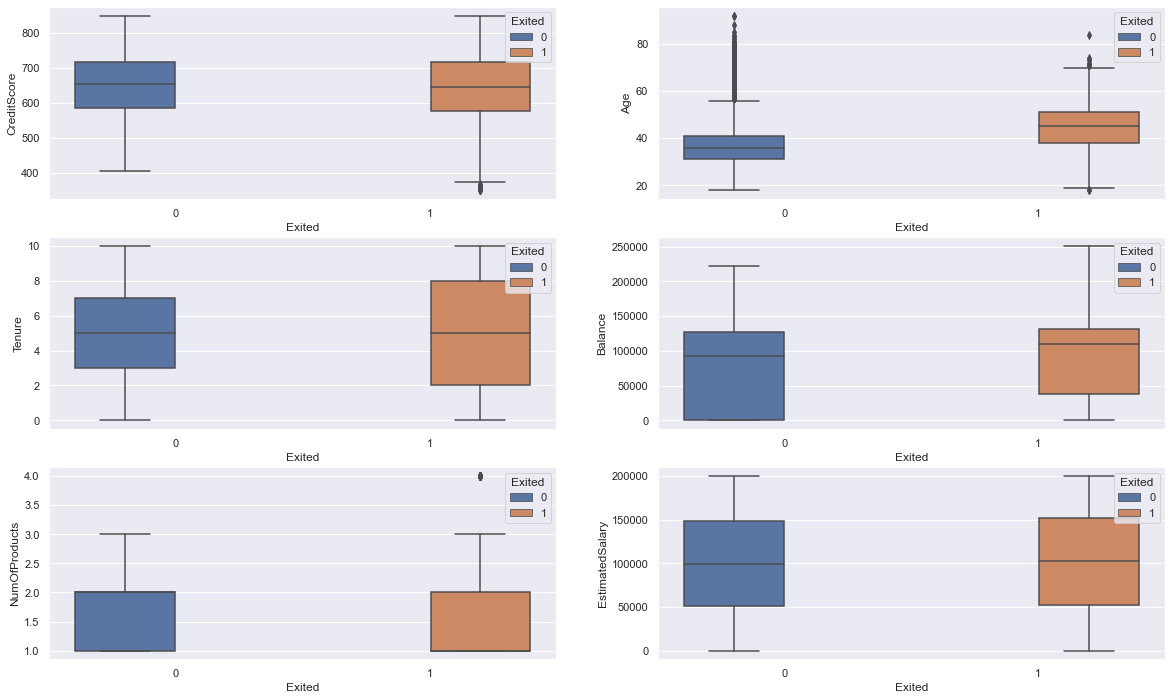

In [24]:
# Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

# making the model

In [25]:
#using column transformer to apply one hot encodnig to selected columns
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [26]:
#converting the data into one_hot encoding
onehot_features=pd.get_dummies(df,drop_first=True)

In [27]:
onehot_features.shape

(10000, 13)

<AxesSubplot:>

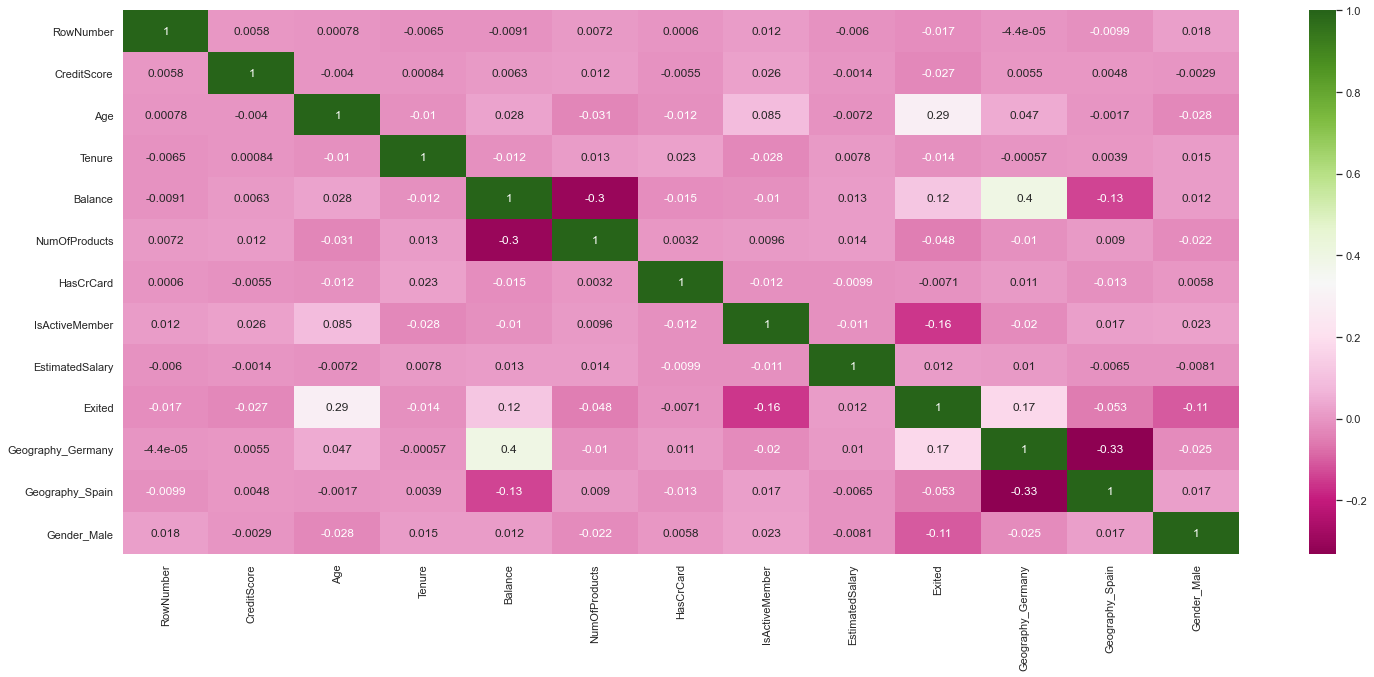

In [28]:
#plotting the correlation
corrmat1=onehot_features.corr()
top_corr1=corrmat1.index
plt.figure(figsize=(25,10))

sns.heatmap(onehot_features[top_corr1].corr(),annot=True,cmap='PiYG')

In [29]:
lr_X=onehot_features.drop('Exited',axis=1)
lr_y=onehot_features.Exited

In [30]:
#splitting the data into train test split
lr_Xtrain,lr_Xtest,lr_ytrain,lr_ytest=train_test_split(lr_X,lr_y,test_size=0.2,random_state=1,stratify=y)

In [32]:
logre.fit(lr_Xtrain,lr_ytrain)

LogisticRegression()

In [296]:
#making the prediction
lryprd=logre.predict(lr_Xtest)
lryprd

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
#confusion matrix
print(metrics.confusion_matrix(lr_ytest,lryprd))

[[1558   35]
 [ 387   20]]


In [41]:
onehot_features.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [42]:
from sklearn.model_selection import cross_val_score

In [297]:
#importig required model
from sklearn.svm import SVC
sv=SVC()
from catboost import CatBoostClassifier
cat=CatBoostClassifier(silent=True)
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfr_tuning=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
from sklearn.linear_model import LogisticRegression
logrg=LogisticRegression()

In [298]:
#gettig all the model precission before hyper parameter tuning
model_name=['LogisticRegression','AdaBoostClassifier','RandomForestClassifier',
                'DecisionTreeClassifier','KNeighborsClassifier','catboost']
model_list=[logrg,ada,rfr_tuning,dt,kn,cat,sv]
for list_name,model_name in zip (model_list,model_name):
    rt3=(cross_val_score(list_name,lr_X,lr_y,cv=10,scoring='recall'))
    result=rt3.mean()
    print(result,model_name,' Recall score') 

0.06425673717762967 LogisticRegression  Recall score
0.45099246595189796 AdaBoostClassifier  Recall score
0.456522264078045 RandomForestClassifier  Recall score
0.5188834154351396 DecisionTreeClassifier  Recall score
0.08884139862841689 KNeighborsClassifier  Recall score
0.4888413986284169 catboost  Recall score


calculating on a base model without hyperparameter tunung, the more the value of recall
the more better is our model.

In [47]:
#making random forest model
rfr_tuning.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [48]:
randomfr=rfr_tuning
randomfr.fit(lr_Xtrain,lr_ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [215]:
random_with_tune=RandomForestClassifier(bootstrap= True,
 criterion='gini',
 max_depth= 5,
 max_features= 7,
 min_samples_leaf= 4,
 min_samples_split= 4,
 n_estimators= 550)

In [216]:
y_pred=rfr_tuning.predict(lr_Xtest)

In [217]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [218]:
rftuned1=random_with_tune.fit(lr_Xtrain,lr_ytrain)
rftuned1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
y_predtunedrf=rftuned1.predict(lr_Xtest)
y_predtunedrf

array([0, 0, 0, ..., 0, 0, 0])

hyperparameter tuning random clasifer

In [53]:
from sklearn.model_selection import GridSearchCV

In [288]:
#setting the parameter for random_forest
param_rf={'n_estimators':[500],
'criterion':['gini'],
 'min_samples_split': [2,4],
 'min_samples_leaf': [2,4],
 'max_features':[7,10,13],
 'max_depth': [3,5],
 'bootstrap': [True]}

In [289]:
tuned_rf=GridSearchCV(estimator=rfr_tuning,param_grid=param_rf,cv=5,verbose=0)

In [290]:
tuned_rf.fit(lr_Xtrain,lr_ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [154]:
tuned_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [69]:
from sklearn.metrics import accuracy_score

our main focus is to minimize the False Negative value, bacause False negative is in 
which our model predict that the customer havent left the bank, but in actual they left the bank,
so we have to  minimize it.

In [220]:
print(accuracy_score(lr_ytest,y_predtunedrf))
pd.crosstab(lr_ytest,y_predtunedrf)

0.8615


col_0,0,1
Exited,,
0,1555,38
1,239,168


In [155]:
print(accuracy_score(lr_ytest,y_pred))
pd.crosstab(lr_ytest,y_pred)

0.864


col_0,0,1
Exited,,
0,1541,52
1,220,187


In [272]:
from sklearn.metrics import roc_curve,roc_auc_score

calculating AUC Score For diffrent Classifier Model

In [292]:
#for model evaluation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [277]:
#printing the roc score of different classification model
name_list=['Catboost Auc Score','knearest Auc Score',
           'DecissionTree Auc Score','RandomForest Auc Score','Ada boost Auc Score']
pred2=cat.predict_proba(lr_Xtest)
pred3=kn.predict_proba(lr_Xtest)
pred4=dt.predict_proba(lr_Xtest)
pred5=rfr_tuning.predict_proba(lr_Xtest)
pred6=ada.predict_proba(lr_Xtest)

auc_score2= roc_auc_score(lr_ytest, pred2[:,1])
auc_score3= roc_auc_score(lr_ytest, pred3[:,1])
auc_score4= roc_auc_score(lr_ytest, pred4[:,1])
auc_score5= roc_auc_score(lr_ytest, pred5[:,1])
auc_score6= roc_auc_score(lr_ytest, pred6[:,1])
print('Roc score for Catboost Classifier :',auc_score2)
print('Roc score for Knn Classifier :',auc_score3)
print('Roc score for decisionTree Classifier :',auc_score4)
print('Roc score for RandomForest Classifier :',auc_score5)
print('Roc score for AdaBoost Classifier :',auc_score6)

Roc score for Catboost Classifier : 0.8549905838041432
Roc score for Knn Classifier : 0.5162365755586094
Roc score for decisionTree Classifier : 0.6860373470542962
Roc score for RandomForest Classifier : 0.8447461328817261
Roc score for AdaBoost Classifier : 0.8431551736636482


The greate the roc score the better our model prediction is 
seems Catboost Classifier is outperforming well.

In [137]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(lr_ytest, pred1[:,1], pos_label=1) #for logistic regression
fpr2, tpr2, thresh2 = roc_curve(lr_ytest, pred2[:,1], pos_label=1) #for catboost regressor

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(lr_ytest))]
proba_fpr, proba_tpr, thresholds = roc_curve(lr_ytest, random_probs, pos_label=1)

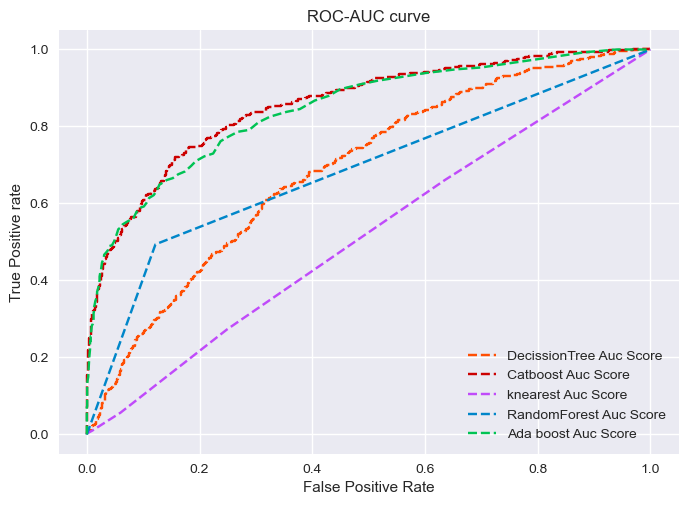

In [302]:
varr=[pred1,pred2,pred3,pred4,pred5,pred6]
colo=['#FF4F03','#CC0000','#C04BFA','#0086C9','#00C354']
name=['DecissionTree Auc Score','Catboost Auc Score',
           'knearest Auc Score','RandomForest Auc Score','Ada boost Auc Score']
for t,y,c in zip (varr,name,colo):
    fpr1, tpr1, thresh1 = roc_curve(lr_ytest, t[:,1], pos_label=1)
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color=c, label=y)

    # title
    plt.title('ROC-AUC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=500) 

From the above graph we can see that CatBosot Classifier is making good predciting as its is more
close towards True Positive line, hence this is our best predicting model for our problem.